# Análise Desafio Porto Seguro - Processo Seletivo Lendico
# Mauro Saab - maurosaab@gmail.com - 31/07/2018 ~ 06/08/2018

## Fazendo a importação das bibliotecas relevantes:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import gc

## Lendo os arquivos de datasets:
#### Usamos "na_values = -1" para reconhecer os valores de "-1" nos Datasets como "missing" (NaN)

In [305]:
path = '../data/raw/'
train = pd.read_csv(path + 'train.csv', na_values=-1)
test = pd.read_csv(path + 'test.csv', na_values=-1)

## Análise Exploratória Preliminar

In [3]:
train.head(3)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0


In [4]:
test.head(3)

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1.0,8,1.0,0.0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2.0,5,1.0,0.0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1.0,3,0.0,0.0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0


#### Nota-se que os databases possuem 58 features (incluindo ID) e 1 target. Além disso, as features possuem labels genéricas, o que dificultará um pouco o julgamento sobre suas importâncias. 
#### Sabemos, no entanto, que:

1. Prefixos "ind" são referentes ao "indivíduo"
2. Prefixos "reg" são referentes à "região"
3. Prefixos "car" são referents ao "carro"
4. Prefixos "calc" são valores "calculados"

#### Além disso:

1. O sufixo "bin" indica valor "binário"
2. O sufixo "cat" indica variável "categórica"
3. A ausência de um sufixo significa "contínuo ou ordinal".

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

#### Desde já, nota-se através do .info() que duas variáveis categóricas referentes ao carro (intituladas car_03_cat e car_05_cat) possuem um grande número de observações faltantes.

In [5]:
test.shape

(892816, 58)

In [6]:
train.shape

(595212, 59)

#### O database de treino (cerca de 600 mil linhas) é menor do que o database de testes (cerca de 900 mil linhas). Na minha (limitada) experiência, é a primeira vez que me deparo com essa divisão, possivelmente porque até este momento lidei com datasets menores.

#### Vamos editar os títulos das features removendo o "ps_" do início a fim de simplificá-los.
#### Para isso vamos usar um dicionário e a função .rename. Vamos aproveitar e distinguir também entre variáveis ordinais e contínuas.

In [7]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [306]:
dict_rename_cols = {}
for i in train.columns:
    if i == 'id':                   
        dict_rename_cols[i] = i + '_cat'       # id é posto no dicionário como id:id_cat
    elif i == 'target':
        dict_rename_cols[i] = i + '_bin'       # target é posto no dicionário como target:target_bin
    else:                                      # Se a coluna não for "id" ou "target"
        dict_rename_cols[i] = i[3:]            # Então removeremos os 3 primeiros caracteres correspondentes a "ps_"
        if i[-1].isdigit():                    # Se o último caráctere for um algarismo, então
            if train[i].dtype == np.float64:          # Conferimos o data type
                dict_rename_cols[i] = i[3:] + '_cont'     # se for float, o dicionário acrescentará _cont
            else:
                dict_rename_cols[i] = i[3:] + '_ord'      # se for inteiro, o dicionário acrescenterá _ord
                
def rename_columns (dataset):
    ''' Aplica o dicionário dict_rename_columns para renomear as colunas removendo "ps_" e adicionando o data type. '''
    dataset.rename(mapper=dict_rename_cols, axis=1, copy=True, inplace=True)
    return dataset

In [307]:
train = rename_columns(train)
test = rename_columns(test)

train.columns

Index(['id_cat', 'target_bin', 'ind_01_ord', 'ind_02_cat', 'ind_03_ord',
       'ind_04_cat', 'ind_05_cat', 'ind_06_bin', 'ind_07_bin', 'ind_08_bin',
       'ind_09_bin', 'ind_10_bin', 'ind_11_bin', 'ind_12_bin', 'ind_13_bin',
       'ind_14_ord', 'ind_15_ord', 'ind_16_bin', 'ind_17_bin', 'ind_18_bin',
       'reg_01_cont', 'reg_02_cont', 'reg_03_cont', 'car_01_cat', 'car_02_cat',
       'car_03_cat', 'car_04_cat', 'car_05_cat', 'car_06_cat', 'car_07_cat',
       'car_08_cat', 'car_09_cat', 'car_10_cat', 'car_11_cat', 'car_11_cont',
       'car_12_cont', 'car_13_cont', 'car_14_cont', 'car_15_cont',
       'calc_01_cont', 'calc_02_cont', 'calc_03_cont', 'calc_04_ord',
       'calc_05_ord', 'calc_06_ord', 'calc_07_ord', 'calc_08_ord',
       'calc_09_ord', 'calc_10_ord', 'calc_11_ord', 'calc_12_ord',
       'calc_13_ord', 'calc_14_ord', 'calc_15_bin', 'calc_16_bin',
       'calc_17_bin', 'calc_18_bin', 'calc_19_bin', 'calc_20_bin'],
      dtype='object')

#### Vamos fazer, a seguir, a organização e a contagem de quais colunas e quantos dados pertencem a cada data type:

In [308]:
def generate_column_arrays(dataset):
    ''' Utiliza as terminações "cat", "bin", "ord" e "cont" para distribuir as colunas do dataset 
    entre 4 arrays, cada um com um único data type '''
    cat_cols, bin_cols, ord_cols, cont_cols = [], [], [], []
    for col in dataset.columns:
        if col[-3:] == 'cat':
            cat_cols.append(col)
        elif col[-3:] == 'bin':
            bin_cols.append(col)
        elif col[-3:] == 'ord':
            ord_cols.append(col)
        else:
            cont_cols.append(col)
    return cat_cols, bin_cols, ord_cols, cont_cols
    
cat_cols, bin_cols, ord_cols, cont_cols = generate_column_arrays(train)

In [309]:
cat_cols

['id_cat',
 'ind_02_cat',
 'ind_04_cat',
 'ind_05_cat',
 'car_01_cat',
 'car_02_cat',
 'car_03_cat',
 'car_04_cat',
 'car_05_cat',
 'car_06_cat',
 'car_07_cat',
 'car_08_cat',
 'car_09_cat',
 'car_10_cat',
 'car_11_cat']

In [310]:
def calculate_datatype_amounts(dataset):
    ''' A partir das arrays de datatype, faz a soma dos elementos não nulos de cada coluna para
    obter o volume total de dados de cada tipo'''
    cat_total, bin_total, ord_total, cont_total = 0, 0, 0, 0

    for cat in cat_cols:
        cat_total += dataset[cat].notnull().sum()
    for bina in bin_cols:
        bin_total += dataset[bina].notnull().sum()
    for ordi in ord_cols:
        ord_total += dataset[ordi].notnull().sum()
    for cont in cont_cols:
        cont_total += dataset[cont].notnull().sum()

    return cat_total, bin_total, ord_total, cont_total

cat_total, bin_total, ord_total, cont_total = calculate_datatype_amounts(train)

In [311]:
print ('Features Categóricas: {one} / Features Binárias: {two} / Features Ordinais: {three} / Features Contínuas: {four}'.format
       (one= len(cat_cols) , two= len(bin_cols) , three=len(ord_cols) , four=len(cont_cols)))

print ('Dados Categóricos: {one} / Dados Binários: {two} / Dados Ordinais: {three} / Dados Contínuos: {four}'.format
       (one=cat_total, two=bin_total, three=ord_total, four=cont_total))

Features Categóricas: 15 / Features Binárias: 18 / Features Ordinais: 15 / Features Contínuas: 11
Dados Categóricos: 8232120 / Dados Binários: 10713816 / Dados Ordinais: 8928180 / Dados Contínuos: 6396934


#### Vamos condensar essas informações em um DataFrame, caso seja necessário acessá-las adiante:

In [312]:
data_types = ["Categóricos", "Binários", "Ordinais", "Contínuos"]
data_amounts = [cat_total, bin_total, ord_total, cont_total]

dtype_dict = {'Data Type': pd.Series(data_types), 'Amount': pd.Series(data_amounts)}
dtype_df = pd.DataFrame(dtype_dict)

feature_amounts = [len(cat_cols), len(bin_cols), len(ord_cols), len(cont_cols)]

dtype_df['Features'] = pd.Series(feature_amounts)

dtype_df

,Amount,Data Type,Features
0,8232120,Categóricos,15
1,10713816,Binários,18
2,8928180,Ordinais,15
3,6396934,Contínuos,11


## Visualização de Dados

#### Vamos começar pela visualização dos dados faltantes através de um mapa de calor:

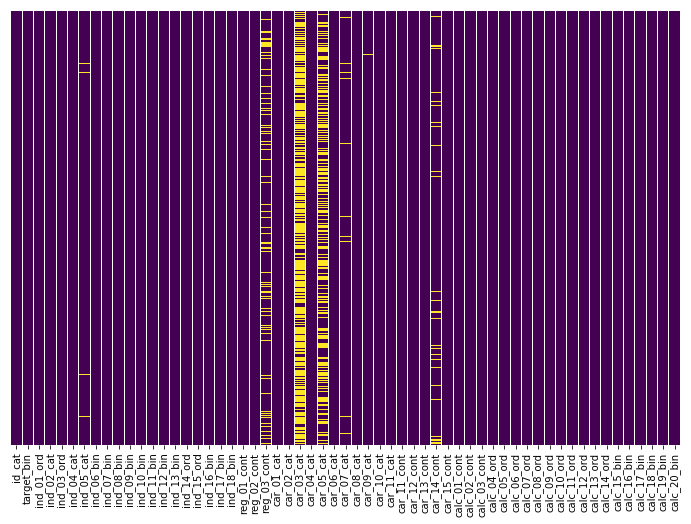

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

#### Nota-se que além das duas features já identificadas anteriormente, há duas outras com uma quantidade significativa de Missings, e outras três com um pequeno volume de dados faltantes.

#### A 'vantagem' que as features reg_03 e car_14 oferecem sobre a car_03 e a car_05 é que seu volume de nulos é menor e elas possuem dtype "contínuo", o que poderia abrir o caminho para uma abordagem de preenchimento através da média.

#### Em seguida, vamos analisar a distribuição de targets no dataset de treino:

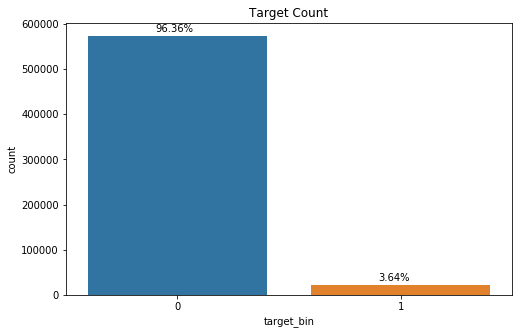

In [27]:
plt.figure(figsize=(8,5))
plt.title("Target Count")

cntplot = sns.countplot(x='target_bin', data=train)

for p in cntplot.patches:  # Código por Felipe Antunes
    cntplot.annotate('{:.2f}%'.format(100*p.get_height()/len(train['target_bin'])), (p.get_x()+ 0.3, p.get_height()+10000))

#### Nota-se que é esperado que a maioria esmagadora das pessoas não acione o seguro (~96% para essa fração dos dados). Uma estatística bastante interessante.

#### Vamos ver agora a distribuição de Features por Data Type:

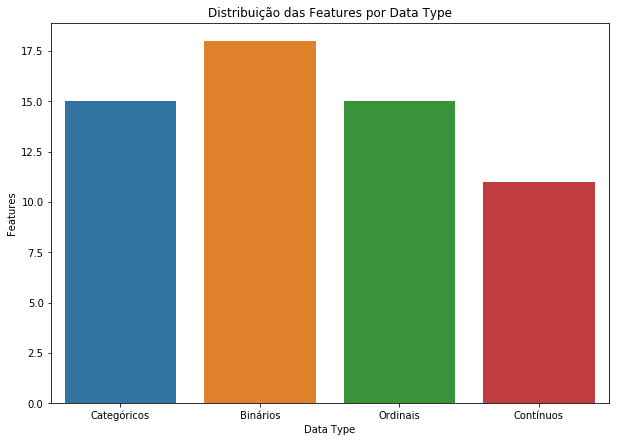

In [28]:
plt.figure(figsize=(10,7))
plt.title("Distribuição das Features por Data Type")
sns.barplot(data=dtype_df, x='Data Type', y = 'Features')

#### O fato das features serem "confidenciais" torna difícil escolher pares de features para gerar histogramas, box-plots, ou para segregar um tipo de dado por categoria relevante (por exemplo usando "hue", ou "groupby") para obter informações adicionais.
#### Assim sendo, vamos explorar as correlações entre as grandezas que contém informações faltantes. 
#### Utilizarei código do notebook do Felipe para gerar o heatmap e o dendrograma usando Missingno:


In [29]:
missingValueColumns = train.columns[train.isnull().any()].tolist()   # Código por Felipe Antunes
df_null = train[missingValueColumns]
missingValueColumns

['ind_02_cat',
 'ind_04_cat',
 'ind_05_cat',
 'reg_03_cont',
 'car_01_cat',
 'car_02_cat',
 'car_03_cat',
 'car_05_cat',
 'car_07_cat',
 'car_09_cat',
 'car_11_cont',
 'car_12_cont',
 'car_14_cont']

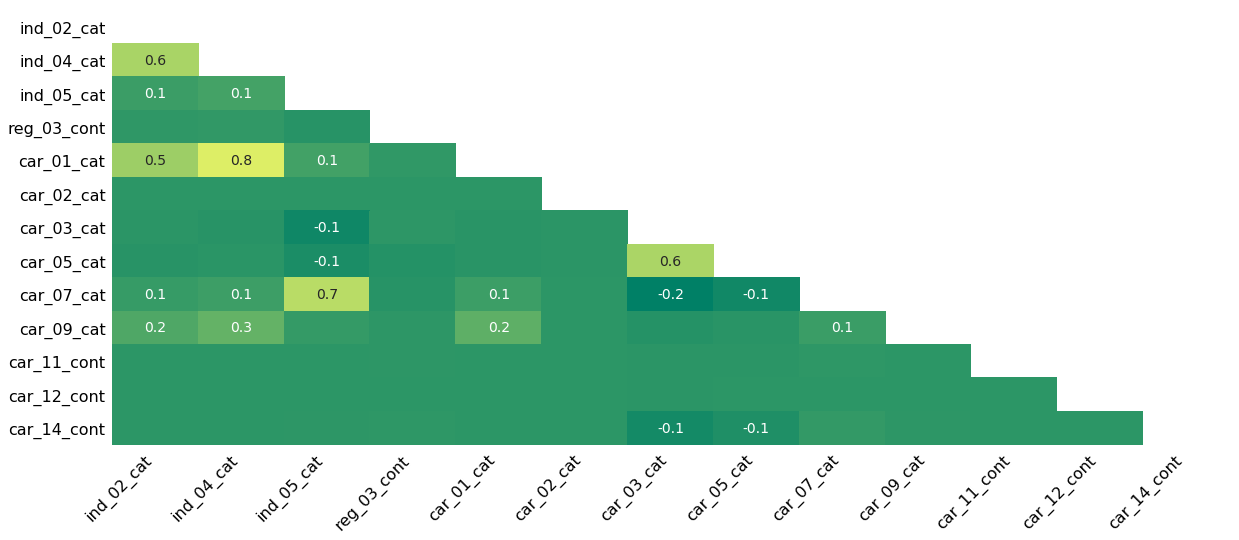

In [36]:
msno.heatmap(df_null,figsize=(20,8),cmap='summer') # Código por Felipe Antunes

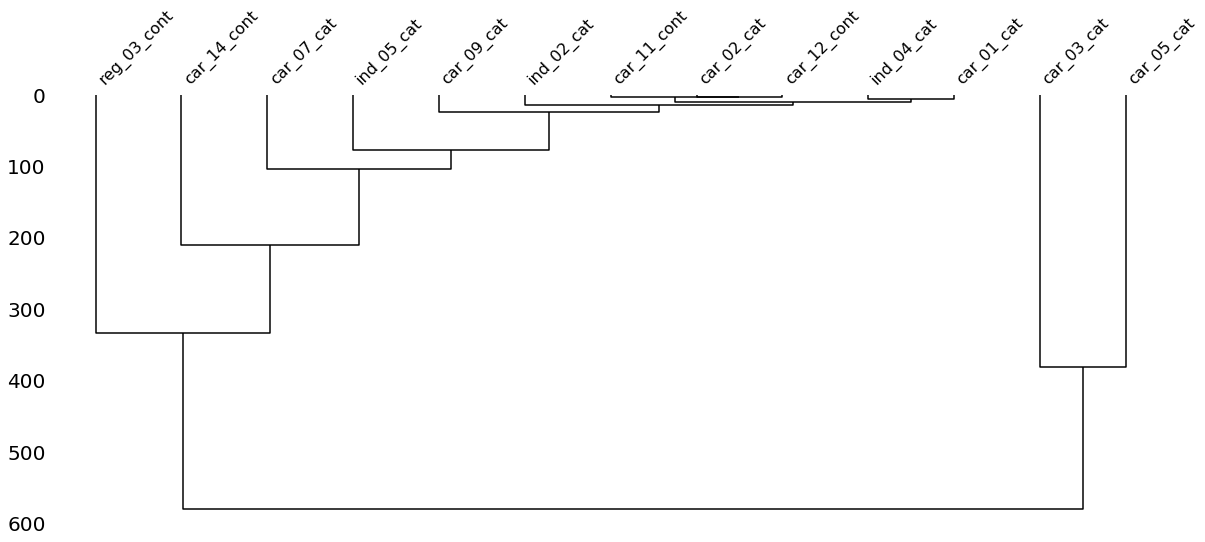

In [288]:
msno.dendrogram(df_null,figsize=(20,8))

#### Sabemos que as colunas mais importantes que contém valores faltantes são, em ordem: CAR_03, CAR_05, REG_03 e CAR_14. 
#### A única correlação relevante apontada pelo mapa de calor que envolvesse qualquer uma delas foi justamente entre duas delas: o valor de 0.6 para correlação entre CAR_03 e CAR_05. 
#### Além dessas, existem 9 outras colunas menos importantes, sendo duas com dados contínuos e sete com categóricos.

#### Minha proposta para os missings será:

1. Dropar CAR_03 e CAR_05, dado que ambas são as campeãs de missings e apresentam uma correlação moderada entre si.
2. Preencher as colunas de valores contínuos REG_03, CAR_14 (maior quantidade de Missings) e CAR_11, CAR_12 (menor quantidade de Missings) utilizando a média da coluna.
3. Preencher as demais sete colunas categóricas que contém poucos missings com o valor '-1'


Dropando car_03 e car_05:

In [313]:
train.drop('car_03_cat', axis = 1, inplace = True)
train.drop('car_05_cat', axis = 1, inplace = True)
test.drop('car_03_cat', axis = 1, inplace = True)
test.drop('car_05_cat', axis = 1, inplace = True)

Fillando com a média:

In [314]:
train['reg_03_cont'].fillna(value=train['reg_03_cont'].mean(), inplace = True)
test['reg_03_cont'].fillna(value=test['reg_03_cont'].mean(), inplace = True)

train['car_14_cont'].fillna(value=train['car_14_cont'].mean(), inplace = True)
test['car_14_cont'].fillna(value=test['car_14_cont'].mean(), inplace = True)

train['car_11_cont'].fillna(value=train['car_11_cont'].mean(), inplace = True)
test['car_11_cont'].fillna(value=test['car_11_cont'].mean(), inplace = True)

train['car_12_cont'].fillna(value=train['car_12_cont'].mean(), inplace = True)
test['car_12_cont'].fillna(value=test['car_12_cont'].mean(), inplace = True)

      

Preenchendo as variáveis categóricas restantes com -1: (outra possibilidade seria preencher com o valor mais frequente da coluna)

In [315]:
train.fillna(-1, inplace=True)
test.fillna(-1, inplace=True)

## Agora não há mais valores faltantes nos datasets.

## Vamos tentar aplicar um modelo simples de Regressão Logística direto do SK-Learn.

#### Iniciaremos com uma análise de colinearidade entre variáveis contínuas

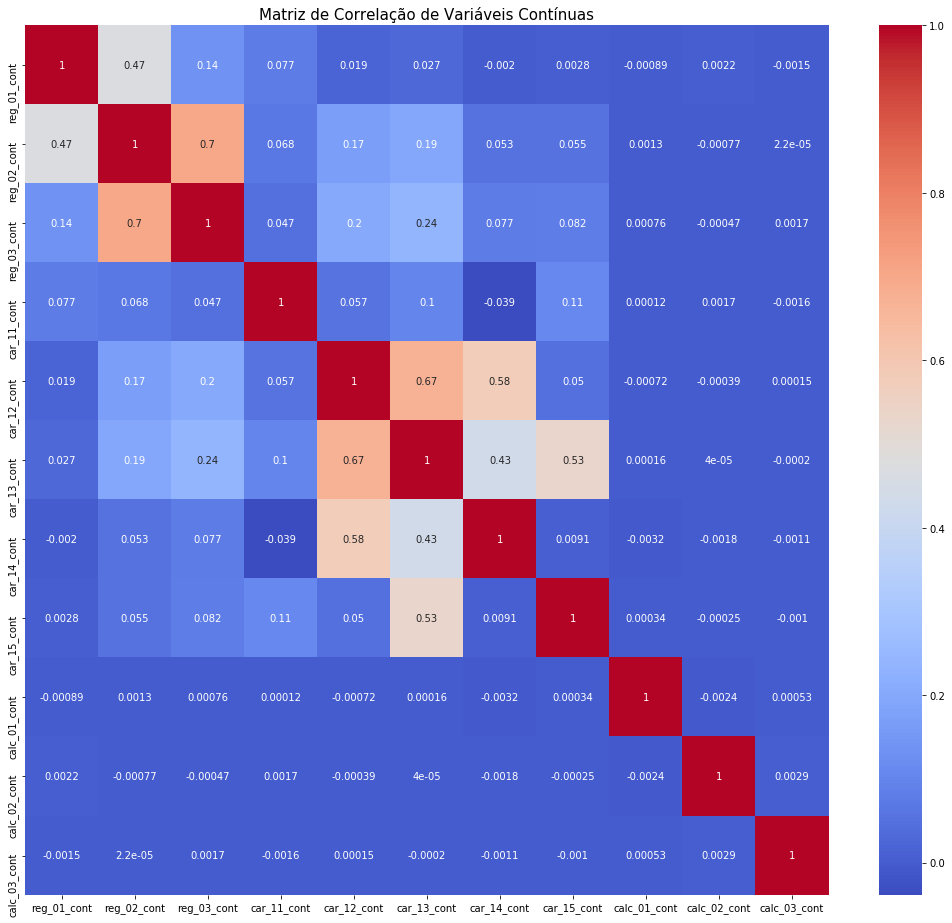

In [42]:
plt.figure(figsize=(18,16))
plt.title('Matriz de Correlação de Variáveis Contínuas', size=15)
sns.heatmap(train[cont_cols].corr(), cmap='coolwarm', annot=True)

#### Aqui, os valores que mais chamam a atenção são os que se encontram entre 0.58 e 0.7 entre as variáveis regionais 02 e 03 e entre as variáveis do carro 12, 13 e 14. É razoável assumir que, por sua natureza, algumas grandezas desses grupos (região e carro) serão linkadas com correlações de moderadas a fortes, e não há nenhum grande alerta em relação à colinearidade em um primeiro momento.

In [334]:
from sklearn.linear_model import LogisticRegression

In [335]:
log_reg = LogisticRegression()

#### Após instanciar, vamos fittar o modelo utilizando o dataset de treino e os targets que ele contém.

In [336]:
log_reg.fit(train.drop('target_bin', axis=1), train['target_bin'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Em seguida, vamos tirar predições probabilísticas (usando predict_proba, e não categóricas usando predict) da chance de cada indivíduo segurado do dataset de testes acionar o seguro.

In [337]:
predictions = log_reg.predict_proba(test)[:,1]

In [338]:
predictions

array([0.07455955, 0.03192907, 0.13293999, ..., 0.03818434, 0.02980317,
       0.0186682 ])

In [339]:
len(predictions)

892816

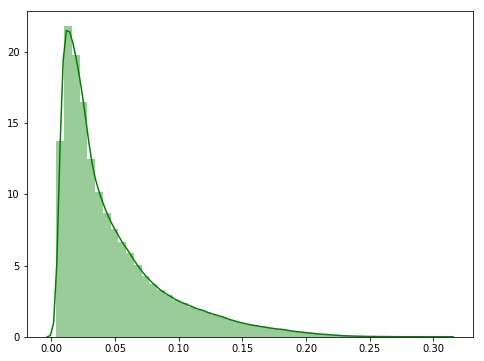

In [340]:
plt.figure(figsize = (8,6))
sns.distplot(predictions, color = 'g')

#### A título de curiosidade, vamos submeter esse modelo (o mais simples possível) para ver qual o resultado no Kaggle. 
#### Vamos criar uma função para gerar uma submissão:

In [81]:
def create_submission(predictions, file_name):
    ''' Recebe as predições e um nome de arquivo e cria na mesma pasta um .csv com o nome desejado
    para ser submetido ao Kaggle'''
    submission = pd.DataFrame(columns=['id', 'target'])
    submission['target'] = predictions
    submission['id'] = test['id_cat'].values
    submission.to_csv('file_name.csv', index=False)
    print ("Arquivo criado:")
        
    return pd.read_csv(file_name).head()

create_submission(predictions, 'test_submission.csv')

Arquivo criado:


,id,target
0,0,0.074560
1,1,0.031929
2,2,0.132940
3,3,0.126576
4,4,0.029920


#### O Score atingido foi de -0.03191. Um score relativamente ruim era esperado, dado que não fizemos a normalização dos dados nem lançamos mão de outros recursos mais sofisticados.

#### Antes de tentar melhorar ou mexer na regularização do modelo de regressão logística, vamos investigar se o dataset é um bom candidato a ser tratado com uma abordagem de KNN.

#### Vamos normalizar os dados com "data type = contínuo" e construir com eles um pair-plot:

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train[cont_cols])
transformed = scaler.transform(train[cont_cols])
train_cont_norm = pd.DataFrame(transformed)

#### Vamos investigar a divisão visual dos dados no pairplot para termos uma idéia da eficácia do KNN aqui.

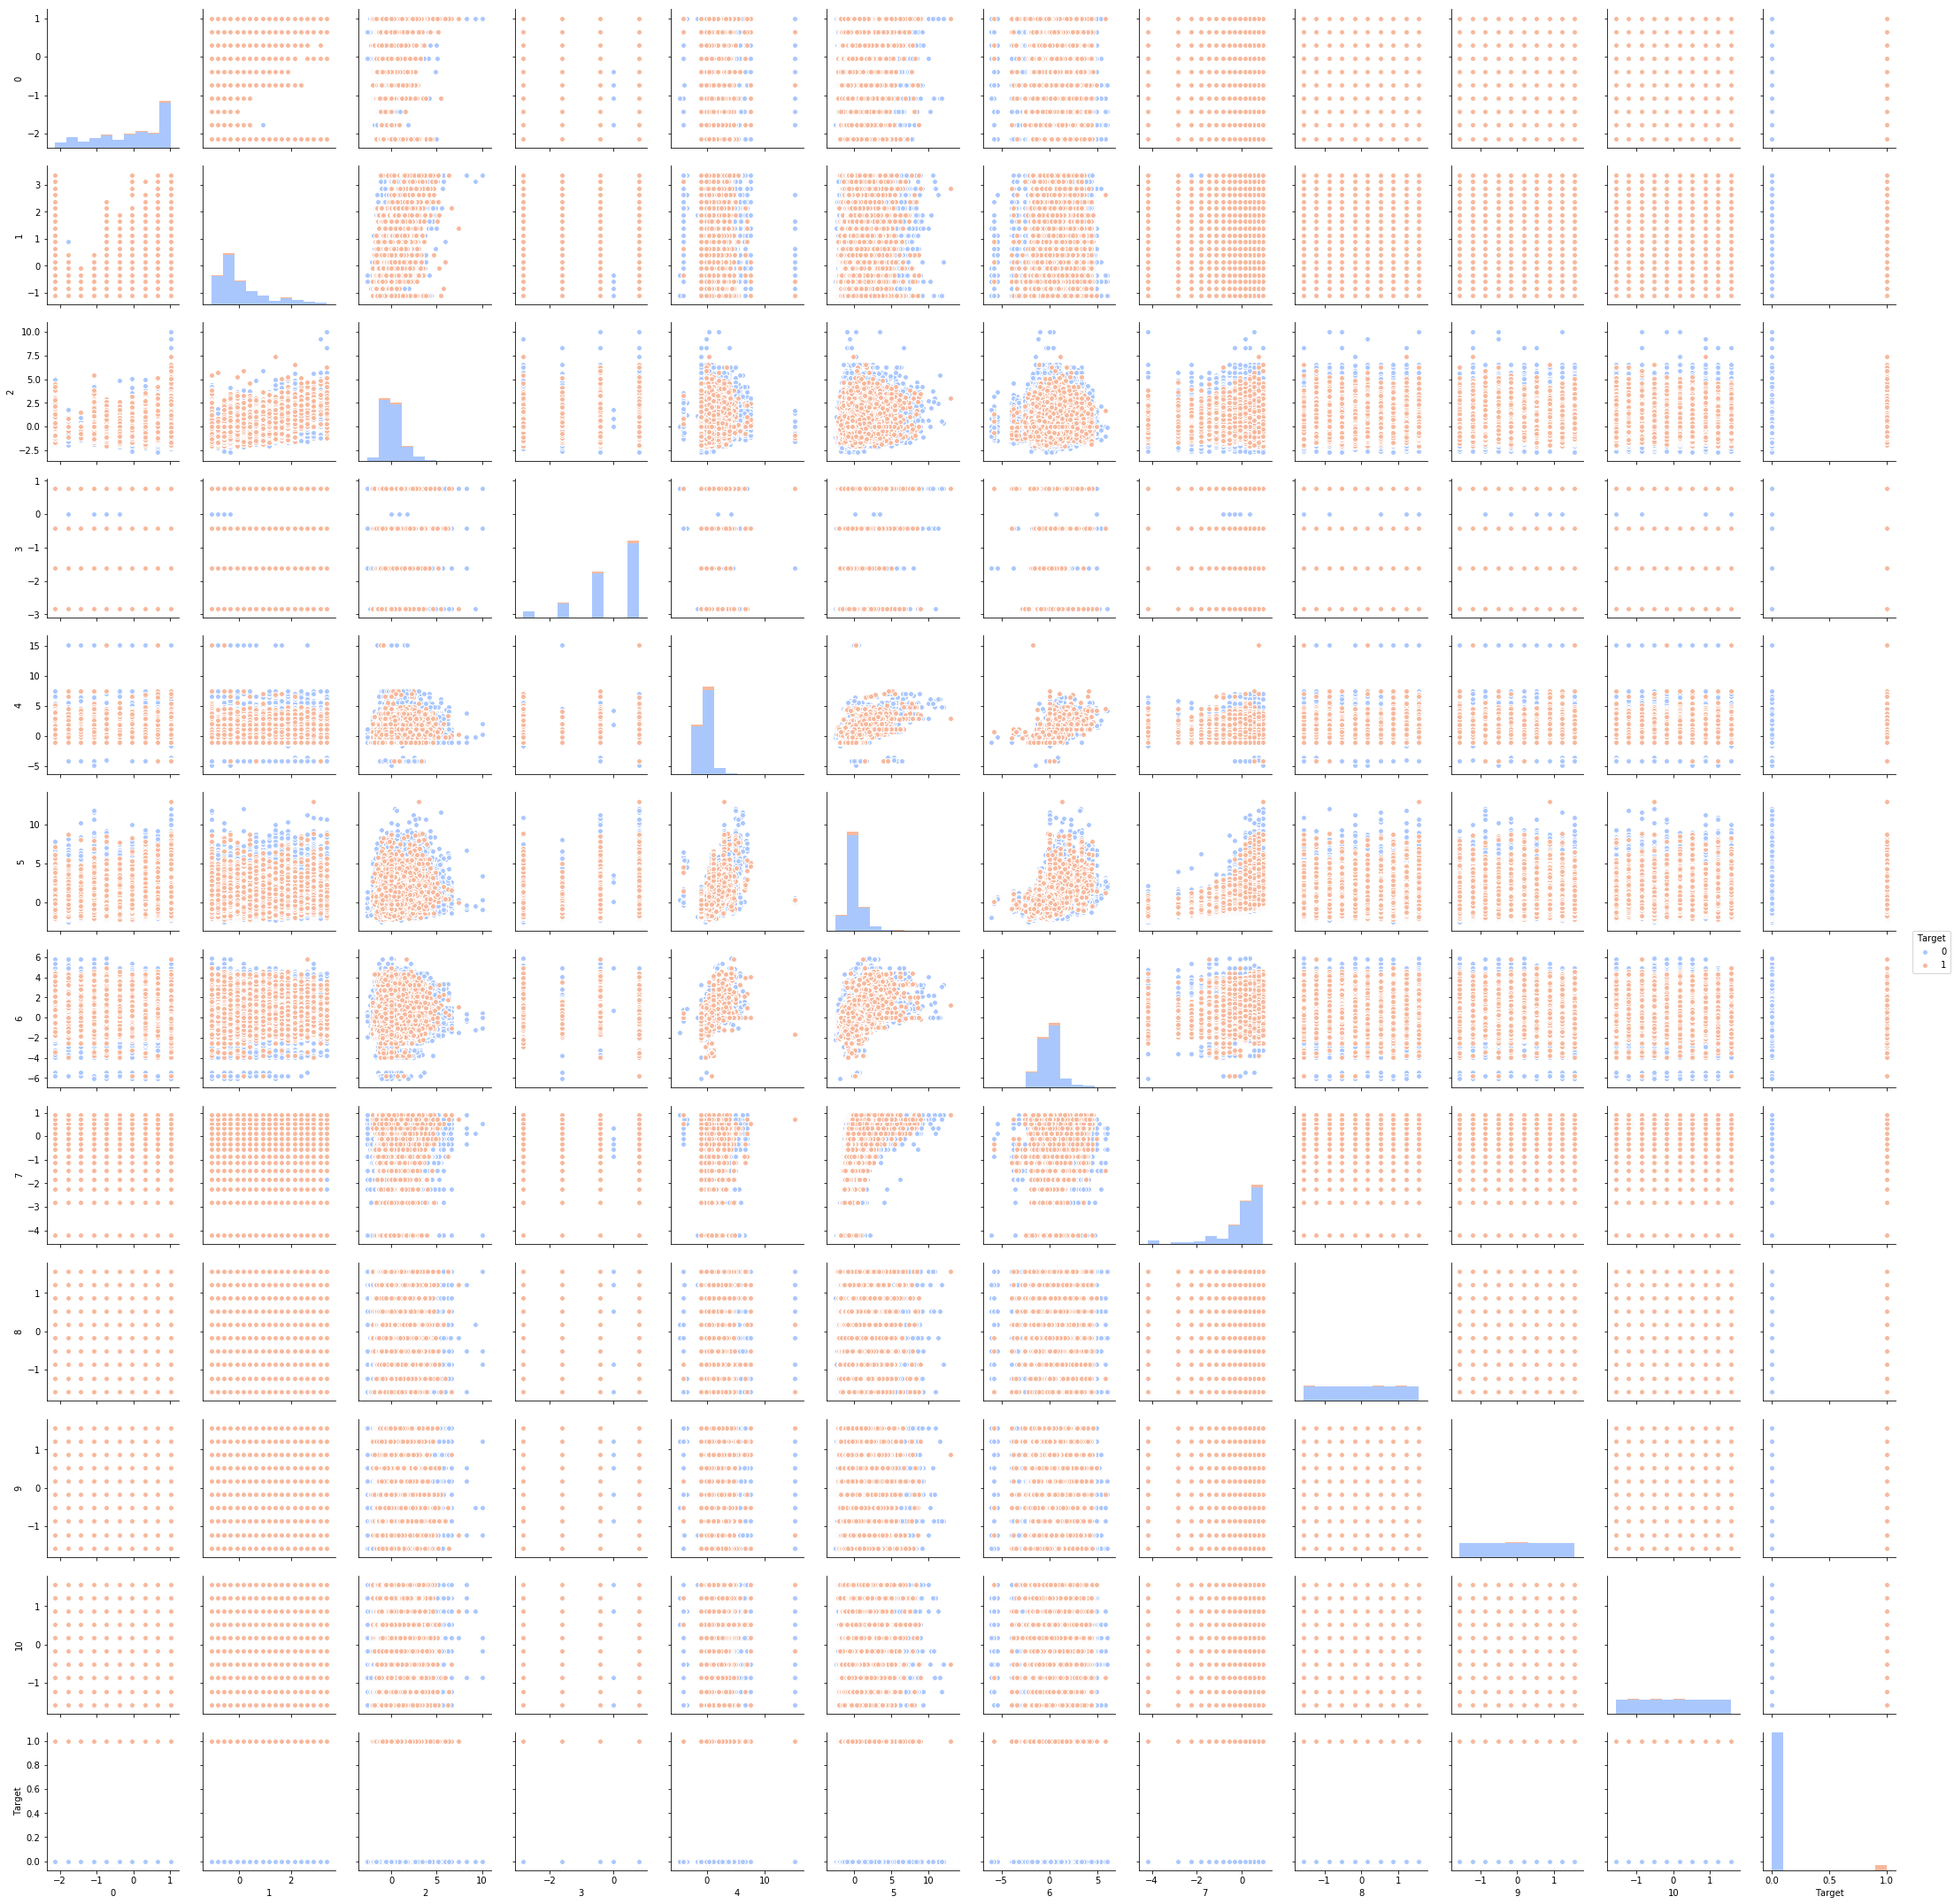

In [556]:
train_cont_norm['Target'] = train['target_bin']

sns.pairplot(train_cont_norm, hue='Target', palette='coolwarm')

#### Não é um grande resultado, mas existe ALGUM nível de separação. Vamos continuar com a implementação do KNN e fazer uma outra submissão para fins de comparação.

#### Vamos utilizar o "método do cotovelo" a fim de determinar um número ideal de vizinhos para esse caso, isto é, o tamanho do cluster. Sabemos que é aconselhável que o número de vizinhos não seja proporcional às possibilidades de target. Aqui o target é binário, portanto forçaremos um número ímpar de vizinhos.

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('target_bin', axis=1), train['target_bin'], test_size = 0.3)

#### Aqui estamos dividindo o dataset de treino em datasets de treino (70%) e teste (30%). Fazemos isso para ter acesso ao parâmetro y_test que não teríamos de outra forma (dado que as respostas do dataset de teste pertencem à Porto Seguro).

#### Tendo acesso a y_test, poderemos investigar qual valor de K (número de vizinhos) dará uma menor taxa de erro. Valores maiores que 7 vizinhos não serão considerados aqui por questão de preço computacional.

In [55]:
error_rate = []
K = [1, 3, 5, 7]

for i in K:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_knn = knn.predict_proba(X_test)[:,1]
    error_rate.append(np.mean(pred_knn != y_test))

Text(0,0.5,'Error_Rate')

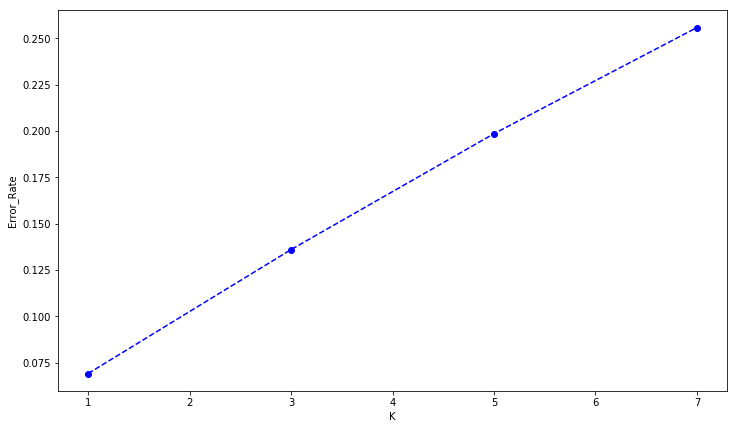

In [56]:
plt.figure(figsize = (12,7))
plt.plot(K, error_rate, color='b', linestyle='dashed', marker='o')
plt.xlabel('K')
plt.ylabel('Error_Rate')

#### Notamos que o erro sobe com o número de vizinhos. Isso provavelmente se deve ao fato de que temos classes muito desbalanceadas, e pode reforçar o fato de que KNN não será o melhor classificador aqui. Ainda assim, vou optar por submeter no Kaggle um fit de de KNN com n = 1.

In [57]:
knn = KNeighborsClassifier(n_neighbors=1)

#### Vamos criar uma cópia do dataframe principal para substituir as colunas com data-type contínuo pelas normalizadas, e depois passá-lo inteiro pro treino do KNN.

In [58]:
train_knn = train.copy()

In [62]:
train_knn[cont_cols] = train_cont_norm

In [84]:
knn.fit(train_knn.drop('target_bin', axis=1), train_knn['target_bin'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [86]:
pred_knn = knn.predict_proba(test)[:,1]

In [87]:
create_submission(pred_knn, 'test_submission_knn.csv')

Arquivo criado:


,id,target
0,0,0.000000
1,1,0.142857
2,2,0.000000
3,3,0.000000
4,4,0.142857


#### O Score atingido foi: -0.00816

#### Pudemos ver pelos resultados que o KNN acabou simplificando demais, com quase todas as previsões diferentes de zero possuindo o mesmo valor, o que não é aceitável num problema com esse número de variáveis. É esperado que cada pequena variável tenha uma influência sobre nossa capacidade de prever o acionamento do seguro e que raramente a previsão seja idêntica para dois indivíduos diferentes.

#### Vamos voltar à regressão logística e utilizar algumas estratégias diferentes:
    - Vamos identificar variáveis contínuas ou ordinais que possuam poucos valores únicos (menores que um limiar arbitrário)
        - Utilizaremos get_dummies para dar um tratamento categórico a essas variáveis
        - Essa decisão é inspirada na abordagem utilizada por Ivan Zhou, no Kernel disponível em
            https://www.kaggle.com/ivanzhouyue/logistic-regression-for-beginner-plb-0-27073
    
    - Eventualmente, mexeremos nos parâmetros de regularização padrão

## Vamos determinar quantos valores diferentes estão presentes em cada coluna de variáveis contínuas ou ordinais:

In [316]:
def contar_valores_unicos(dataset):
    df = pd.DataFrame()
    df['Quantidade de Valores Únicos'] = dataset.nunique()
    df['Data Type'] = dataset.dtypes
    return df

print (contar_valores_unicos(train[cont_cols]), contar_valores_unicos(train[ord_cols]))

              Quantidade de Valores Únicos Data Type
reg_01_cont                             10   float64
reg_02_cont                             19   float64
reg_03_cont                           5013   float64
car_11_cont                              5   float64
car_12_cont                            184   float64
car_13_cont                          70482   float64
car_14_cont                            850   float64
car_15_cont                             15   float64
calc_01_cont                            10   float64
calc_02_cont                            10   float64
calc_03_cont                            10   float64              Quantidade de Valores Únicos Data Type
ind_01_ord                              8     int64
ind_03_ord                             12     int64
ind_14_ord                              5     int64
ind_15_ord                             14     int64
calc_04_ord                             6     int64
calc_05_ord                             7     int64


### Digamos que nosso limiar arbitrário será de 15 valores únicos. Assim, temos:

In [317]:
colunas_categorizaveis = ['reg_01_cont','car_11_cont', 'car_15_cont','calc_01_cont',
                          'calc_02_cont', 'calc_03_cont', 'ind_01_ord', 'ind_03_ord', 'ind_14_ord', 
                          'ind_15_ord', 'calc_04_ord', 'calc_05_ord','calc_06_ord', 'calc_07_ord', 
                          'calc_08_ord', 'calc_09_ord', 'calc_12_ord', 'calc_13_ord'
                         ]                        

#### Vamos acrescentar "_cat" ao fim de cada uma dessas colunas e atualizar o dataframe de treino, novamente utilizando um dicionário.

In [318]:
dict_categ = {}
for i in colunas_categorizaveis:
    dict_categ[i] = i + '_cat'

train.rename(mapper=dict_categ, axis=1, copy=True, inplace = True)
    
train.columns

Index(['id_cat', 'target_bin', 'ind_01_ord_cat', 'ind_02_cat',
       'ind_03_ord_cat', 'ind_04_cat', 'ind_05_cat', 'ind_06_bin',
       'ind_07_bin', 'ind_08_bin', 'ind_09_bin', 'ind_10_bin', 'ind_11_bin',
       'ind_12_bin', 'ind_13_bin', 'ind_14_ord_cat', 'ind_15_ord_cat',
       'ind_16_bin', 'ind_17_bin', 'ind_18_bin', 'reg_01_cont_cat',
       'reg_02_cont', 'reg_03_cont', 'car_01_cat', 'car_02_cat', 'car_04_cat',
       'car_06_cat', 'car_07_cat', 'car_08_cat', 'car_09_cat', 'car_10_cat',
       'car_11_cat', 'car_11_cont_cat', 'car_12_cont', 'car_13_cont',
       'car_14_cont', 'car_15_cont_cat', 'calc_01_cont_cat',
       'calc_02_cont_cat', 'calc_03_cont_cat', 'calc_04_ord_cat',
       'calc_05_ord_cat', 'calc_06_ord_cat', 'calc_07_ord_cat',
       'calc_08_ord_cat', 'calc_09_ord_cat', 'calc_10_ord', 'calc_11_ord',
       'calc_12_ord_cat', 'calc_13_ord_cat', 'calc_14_ord', 'calc_15_bin',
       'calc_16_bin', 'calc_17_bin', 'calc_18_bin', 'calc_19_bin',
       'calc_20_bin'

#### Agora os nomes das colunas já foram transformados. Vamos converter todas as variáveis categóricas para dummies:

In [319]:
train_dummy = pd.get_dummies(train, drop_first = True)

In [321]:
train_dummy.head()

,id_cat,target_bin,ind_01_ord_cat,ind_02_cat,ind_03_ord_cat,ind_04_cat,ind_05_cat,ind_06_bin,ind_07_bin,ind_08_bin,...,calc_11_ord,calc_12_ord_cat,calc_13_ord_cat,calc_14_ord,calc_15_bin,calc_16_bin,calc_17_bin,calc_18_bin,calc_19_bin,calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


#### Vamos importar um novo normalizador, mais robusto para outliers, que subtrai a mediana e escalona os dados de acordo com a distância interquartílica (distância entre o primeiro e o terceiro quartil).

#### Tipicamente, a normalização é feita com a subtração da média e o escalonamento é feito com a variância. No entanto, outliers influenciam esse processo negativamente, de modo que a mediana e a distância interquartílica oferecem melhores resultados.

In [322]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

logreg = make_pipeline(RobustScaler(), LogisticRegression())    # Código por Ivan Zhou

Vamos fittar os dados:

In [323]:
logreg.fit(train_dummy.drop('target_bin', axis=1), train_dummy['target_bin'])

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

E fazer predições:

In [329]:
dummy_predictions = logreg.predict_proba(test)[:,1]

In [330]:
dummy_predictions

array([0.0297007 , 0.02936871, 0.02692721, ..., 0.02874853, 0.02272476,
       0.03223891])

In [331]:
len(dummy_predictions)

892816

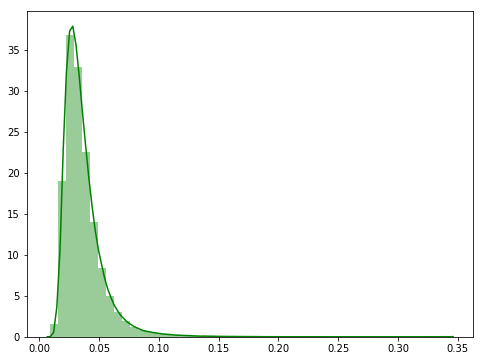

In [332]:
plt.figure(figsize = (8,6))
sns.distplot(dummy_predictions, color = 'g')

#### Após conferir que temos uma distribuição adequada das predições e que sua quantidade está correta, vamos criar uma submissão:

In [346]:
create_submission(dummy_predictions, 'test_submission_dummy.csv')

Arquivo criado:


,id,target
0,0,0.029701
1,1,0.029369
2,2,0.026927
3,3,0.021126
4,4,0.034897


#### Com esse último modelo, foi possível atingir o score de 0.23813 no Kaggle!